In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings;
warnings.filterwarnings("ignore")

In [118]:
df1=pd.read_excel('blore_2017.xlsx')

In [119]:
df1.head()

,From Date,To Date,BP,Benzene,MP-Xylene,O,Toluene,NOx,Ozone,RH,SR,SO2,VWS,WD,WS,CO,Eth-Benzene,PM2.5,NO,NO2
0,01-01-2017 00:00,01-01-2017 01:00,None,4.78,1.75,2.62,NaN,None,17.43,None,0.9,1.54,0.06,88.61,0.19,956.78,2.16,29.43,1.51,19.12
1,01-01-2017 01:00,01-01-2017 02:00,None,4.41,1.64,2.68,NaN,None,21.63,None,0.9,1.75,0.06,87.7,0.2,1036.33,1.71,29.35,1.56,19.38
2,01-01-2017 02:00,01-01-2017 03:00,None,5.24,1.65,2.34,NaN,None,17.29,None,0.9,1.68,0.06,84.23,0.23,998,2.11,30.63,1.5,17.12
3,01-01-2017 03:00,01-01-2017 04:00,None,4.84,1.71,2.5,NaN,None,17.23,None,0.9,2.1,0.06,91.3,0.21,1037.4,2.36,26.88,1.38,13.01
4,01-01-2017 04:00,01-01-2017 05:00,None,4.46,1.22,1.95,NaN,None,19.94,None,0.9,2.04,0.06,79.88,0.22,1004.15,1.45,28.76,1.34,11.79


In [120]:
df=df1[['From Date','BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']]

In [121]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,None,956.78,0.06,88.61,0.19,1.51,19.12,29.43,None,1.54,0.9
1,01-01-2017 01:00,None,1036.33,0.06,87.7,0.2,1.56,19.38,29.35,None,1.75,0.9
2,01-01-2017 02:00,None,998,0.06,84.23,0.23,1.5,17.12,30.63,None,1.68,0.9
3,01-01-2017 03:00,None,1037.4,0.06,91.3,0.21,1.38,13.01,26.88,None,2.1,0.9
4,01-01-2017 04:00,None,1004.15,0.06,79.88,0.22,1.34,11.79,28.76,None,2.04,0.9


In [122]:
df.shape

(8748, 12)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748 entries, 0 to 8747
Data columns (total 12 columns):
From Date    8748 non-null object
BP           8748 non-null object
CO           8748 non-null object
VWS          8748 non-null object
WD           8748 non-null object
WS           8748 non-null object
NO           8748 non-null object
NO2          8748 non-null object
PM2.5        8748 non-null object
RH           8748 non-null object
SO2          8748 non-null object
SR           8748 non-null object
dtypes: object(12)
memory usage: 820.2+ KB


In [124]:
for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan)

In [125]:
print("Percentage of Null values in Banglaore 2017: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Banglaore 2017:  15.192043895747599


In [126]:
df.isna().sum()

From Date       0
BP           2090
CO           1310
VWS          1294
WD           1307
WS           1303
NO           1317
NO2          1317
PM2.5        1795
RH           1526
SO2          1395
SR           1294
dtype: int64

In [127]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [128]:
count/(len(df)*12)

0.051259335467154395

In [129]:
for col in list1:
    if(col!='VWS'):
        for j in df[col]:
            if(j<0):
                df[col]=df[col].replace(j,np.nan)

In [130]:
print("Percentage of Null values in Bangalore 2017: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Bangalore 2017:  16.723822588020116


In [131]:
df.isna().sum()

From Date       0
BP           2090
CO           1366
VWS          1294
WD           1307
WS           1303
NO           1317
NO2          1317
PM2.5        1795
RH           1526
SO2          1395
SR           2846
dtype: int64

In [132]:
df=df.dropna(axis=0,subset=['PM2.5'])

In [133]:
m=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
for col in m:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [134]:
df.isna().sum()

From Date      0
BP           796
CO             0
VWS            0
WD             0
WS             0
NO             0
NO2            0
PM2.5          0
RH           221
SO2            0
SR            69
dtype: int64

In [135]:
df['BP'].replace(np.nan,df['BP'].mean(),inplace=True)
df['RH'].replace(np.nan,df['RH'].mean(),inplace=True)
df['SR'].replace(np.nan,df['SR'].mean(),inplace=True)

In [136]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

In [137]:
df['BP']=df['BP'].astype(float)
df['CO']=df['CO'].astype(float)
df['VWS']=df['VWS'].astype(float)
df['WD']=df['WD'].astype(float)
df['WS']=df['WS'].astype(float)
df['NO']=df['NO'].astype(float)
df['NO2']=df['NO2'].astype(float)
df['PM2.5']=df['PM2.5'].astype(float)
df['RH']=df['RH'].astype(float)
df['SO2']=df['SO2'].astype(float)
df['SR']=df['SR'].astype(float)

In [138]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,999.555886,956.78,0.06,88.61,0.19,1.51,19.12,29.43,71.492072,1.54,0.9
1,01-01-2017 01:00,999.555886,1036.33,0.06,87.70,0.20,1.56,19.38,29.35,71.492072,1.75,0.9
2,01-01-2017 02:00,999.555886,998.00,0.06,84.23,0.23,1.50,17.12,30.63,71.492072,1.68,0.9
3,01-01-2017 03:00,999.555886,1037.40,0.06,91.30,0.21,1.38,13.01,26.88,71.492072,2.10,0.9
4,01-01-2017 04:00,999.555886,1004.15,0.06,79.88,0.22,1.34,11.79,28.76,71.492072,2.04,0.9


In [139]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000
mean,999.555886,367.064602,-0.046314,166.533547,0.818491,4.979747,24.832461,20.048802,71.492072,5.143562,88.164705
std,92.331627,290.480390,0.163962,90.049614,1.954719,17.069273,14.516973,47.194829,26.095524,53.472670,153.008850
min,0.000000,0.000000,-0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1002.670000,196.820000,-0.120000,71.380000,0.670000,1.810000,17.480000,8.060000,51.770000,0.950000,0.880000
50%,1010.300000,364.220000,-0.020000,222.920000,0.750000,3.580000,24.720000,14.160000,80.240000,1.810000,3.540000
75%,1013.030000,505.030000,0.070000,243.470000,0.880000,5.670000,27.500000,22.340000,94.050000,3.200000,116.740000
max,1081.820000,5117.630000,1.000000,351.080000,131.420000,482.160000,480.130000,999.990000,225.050000,999.990000,999.990000


In [140]:
df['CO'][(df['CO']>10) & (df['CO']<100)]

227     96.64
228     81.90
232     71.99
233     96.63
234     99.28
        ...  
7691    58.00
7885    86.02
7931    99.10
7982    66.10
8005    70.00
Name: CO, Length: 402, dtype: float64

In [141]:
df['CO'] = np.where((df.CO >100),df['CO']/1000,df.CO)
df

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,999.555886,0.95678,0.06,88.61,0.19,1.51,19.12,29.43,71.492072,1.54,0.900000
1,01-01-2017 01:00,999.555886,1.03633,0.06,87.70,0.20,1.56,19.38,29.35,71.492072,1.75,0.900000
2,01-01-2017 02:00,999.555886,0.99800,0.06,84.23,0.23,1.50,17.12,30.63,71.492072,1.68,0.900000
3,01-01-2017 03:00,999.555886,1.03740,0.06,91.30,0.21,1.38,13.01,26.88,71.492072,2.10,0.900000
4,01-01-2017 04:00,999.555886,1.00415,0.06,79.88,0.22,1.34,11.79,28.76,71.492072,2.04,0.900000
5,01-01-2017 05:00,999.555886,1.00660,0.07,69.40,0.28,1.52,13.67,26.63,71.492072,2.23,0.900000
6,01-01-2017 06:00,999.555886,0.97605,0.06,100.10,0.19,1.34,10.02,23.46,71.492072,0.87,1.000000
7,01-01-2017 07:00,999.555886,0.99535,0.06,79.35,0.36,1.62,12.46,14.93,71.492072,1.30,19.400000
8,01-01-2017 08:00,999.555886,0.98002,0.07,85.22,0.43,1.66,11.61,11.78,71.492072,1.15,78.780000
9,01-01-2017 09:00,999.555886,1.04080,0.06,51.39,0.67,1.54,10.93,15.10,71.492072,1.81,193.000000


In [142]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

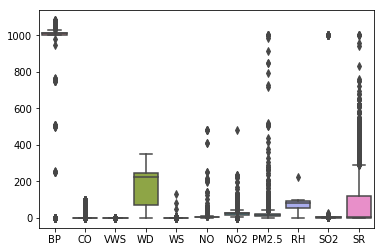

In [143]:
sns.boxplot(data=df)

In [144]:
df.shape

(6953, 12)

In [145]:
df['location']=4
df['location']=df['location'].astype('category')

In [146]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR,location
0,01-01-2017 00:00,999.555886,0.95678,0.06,88.61,0.19,1.51,19.12,29.43,71.492072,1.54,0.9,4
1,01-01-2017 01:00,999.555886,1.03633,0.06,87.70,0.20,1.56,19.38,29.35,71.492072,1.75,0.9,4
2,01-01-2017 02:00,999.555886,0.99800,0.06,84.23,0.23,1.50,17.12,30.63,71.492072,1.68,0.9,4
3,01-01-2017 03:00,999.555886,1.03740,0.06,91.30,0.21,1.38,13.01,26.88,71.492072,2.10,0.9,4
4,01-01-2017 04:00,999.555886,1.00415,0.06,79.88,0.22,1.34,11.79,28.76,71.492072,2.04,0.9,4


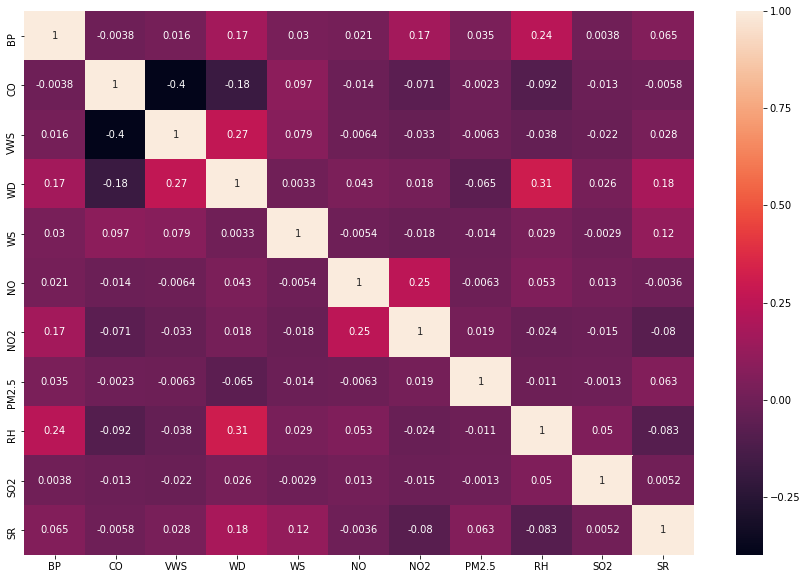

In [147]:
m=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(m,annot=True)

In [148]:
df.columns

Index(['From Date', 'BP', 'CO', 'VWS', 'WD', 'WS', 'NO', 'NO2', 'PM2.5', 'RH',
       'SO2', 'SR', 'location'],
      dtype='object')

In [149]:
"""iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)
up_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)
low_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)

iqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)
up_co=df['CO'].quantile(.75)+(1.5*iqr_co)
low_co=df['CO'].quantile(.25)-(1.5*iqr_co)

iqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)
up_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)
low_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)


iqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)
up_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)
low_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)


iqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)
up_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)
low_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)

iqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)
up_no=df['NO'].quantile(.75)+(1.5*iqr_no)
low_no=df['NO'].quantile(.25)-(1.5*iqr_no)

iqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)
up_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)
low_no2=df['NO2'].quantile(.25)-(1.5*iqr_no2)


iqr_pm=df['PM2.5'].quantile(.75)-df['PM2.5'].quantile(.25)
up_pm=df['PM2.5'].quantile(.75)+(1.5*iqr_pm)
low_pm=df['PM2.5'].quantile(.25)-(1.5*iqr_pm)

iqr_rh=df['RH'].quantile(.75)-df['RH'].quantile(.25)
up_rh=df['RH'].quantile(.75)+(1.5*iqr_rh)
low_rh=df['RH'].quantile(.25)-(1.5*iqr_rh)

iqr_so2=df['SO2'].quantile(.75)-df['SO2'].quantile(.25)
up_so2=df['SO2'].quantile(.75)+(1.5*iqr_so2)
low_so2=df['SO2'].quantile(.25)-(1.5*iqr_so2)

iqr_sr=df['SR'].quantile(.75)-df['SR'].quantile(.25)
up_sr=df['SR'].quantile(.75)+(1.5*iqr_sr)
low_sr=df['SR'].quantile(.25)-(1.5*iqr_sr)
"""

"iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)\nup_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)\nlow_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)\n\niqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)\nup_co=df['CO'].quantile(.75)+(1.5*iqr_co)\nlow_co=df['CO'].quantile(.25)-(1.5*iqr_co)\n\niqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)\nup_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)\nlow_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)\n\n\niqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)\nup_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)\nlow_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)\n\n\niqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)\nup_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)\nlow_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)\n\niqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)\nup_no=df['NO'].quantile(.75)+(1.5*iqr_no)\nlow_no=df['NO'].quantile(.25)-(1.5*iqr_no)\n\niqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)\nup_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)\nlow_no2=df['NO2'].quantil

In [150]:
"""for i in df['CO']:
    if(i>up_co):
        df['CO']=df['CO'].replace(i,up_co)

for i in df['NO2']:
    if(i>up_no2):
        df['NO2']=df['NO2'].replace(i,up_no2)
for i in df['NO']:
    if(i>up_no):
        df['NO']=df['NO'].replace(i,up_no)

for i in df['SO2']:
    if(i>up_so2):
        df['SO2']=df['SO2'].replace(i,up_so2)
        
for i in df['RH']:
    if(i>up_rh):
        df['RH']=df['RH'].replace(i,up_rh)
        
for i in df['VWS']:
    if(i>up_vws):
        df['VWS']=df['VWS'].replace(i,up_vws)
        
for i in df['WS']:
    if(i>up_ws):
        df['WS']=df['WS'].replace(i,up_ws)
        
for i in df['WD']:
    if(i>up_wd):
        df['WD']=df['WD'].replace(i,up_wd)
        
for i in df['PM2.5']:
    if(i>up_pm):
        df['PM2.5']=df['PM2.5'].replace(i,up_pm)
        
for i in df['SR']:
    if(i>up_sr):
        df['SR']=df['SR'].replace(i,up_sr)

for i in df['BP']:
    if(i<low_bp):
        df['BP']=df['BP'].replace(i,low_bp)
    elif(i>up_bp):
        df['BP']=df['BP'].replace(i,up_bp)"""

"for i in df['CO']:\n    if(i>up_co):\n        df['CO']=df['CO'].replace(i,up_co)\n\nfor i in df['NO2']:\n    if(i>up_no2):\n        df['NO2']=df['NO2'].replace(i,up_no2)\nfor i in df['NO']:\n    if(i>up_no):\n        df['NO']=df['NO'].replace(i,up_no)\n\nfor i in df['SO2']:\n    if(i>up_so2):\n        df['SO2']=df['SO2'].replace(i,up_so2)\n        \nfor i in df['RH']:\n    if(i>up_rh):\n        df['RH']=df['RH'].replace(i,up_rh)\n        \nfor i in df['VWS']:\n    if(i>up_vws):\n        df['VWS']=df['VWS'].replace(i,up_vws)\n        \nfor i in df['WS']:\n    if(i>up_ws):\n        df['WS']=df['WS'].replace(i,up_ws)\n        \nfor i in df['WD']:\n    if(i>up_wd):\n        df['WD']=df['WD'].replace(i,up_wd)\n        \nfor i in df['PM2.5']:\n    if(i>up_pm):\n        df['PM2.5']=df['PM2.5'].replace(i,up_pm)\n        \nfor i in df['SR']:\n    if(i>up_sr):\n        df['SR']=df['SR'].replace(i,up_sr)\n\nfor i in df['BP']:\n    if(i<low_bp):\n        df['BP']=df['BP'].replace(i,low_bp)\n    e

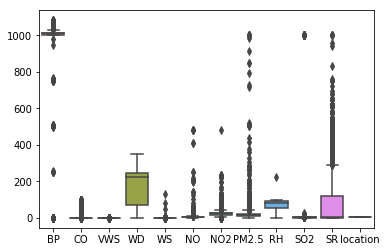

In [151]:
sns.boxplot(data=df)

In [152]:
result_csv1 = df.to_csv (r'C:\dse_new\eda_blore_17.csv', index = None, header=True)

# Upto this basic EDA is done

# ---------------------------------------------------------------------------------------------------------------

In [153]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000,6953.000000
mean,999.555886,2.897036,-0.046314,166.533547,0.818491,4.979747,24.832461,20.048802,71.492072,5.143562,88.164705
std,92.331627,11.746583,0.163962,90.049614,1.954719,17.069273,14.516973,47.194829,26.095524,53.472670,153.008850
min,0.000000,0.000000,-0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1002.670000,0.264200,-0.120000,71.380000,0.670000,1.810000,17.480000,8.060000,51.770000,0.950000,0.880000
50%,1010.300000,0.408730,-0.020000,222.920000,0.750000,3.580000,24.720000,14.160000,80.240000,1.810000,3.540000
75%,1013.030000,0.543750,0.070000,243.470000,0.880000,5.670000,27.500000,22.340000,94.050000,3.200000,116.740000
max,1081.820000,99.870000,1.000000,351.080000,131.420000,482.160000,480.130000,999.990000,225.050000,999.990000,999.990000
